In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer data
dataset = pd.read_csv('train_data2.csv')

#breast_ca = datasets.load_breast_cancer()

# Explore the data
print(dataset.keys())


Index(['time', 'resistance_thumb', 'bend_thumb', 'resistance_index',
       'bend_index', 'resistance_mid', 'bend_mid', 'resistance_ring',
       'bend_ring', 'resistance_little', 'bend_little', 'x', 'y', 'z',
       'stage'],
      dtype='object')


In [99]:
# Putting feature variable to X
X = dataset.drop('stage',axis=1)
# Putting response variable to y
y = dataset['stage']

In [100]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((856, 14), (368, 14))

In [101]:
X_test

,time,resistance_thumb,bend_thumb,resistance_index,bend_index,resistance_mid,bend_mid,resistance_ring,bend_ring,resistance_little,bend_little,x,y,z
661,12:05:31.532,10219.69,1,9599.12,-2,9599.12,-2,9900.00,0,11726.79,10,57,26,-105
220,11:50:12.352,23783.57,82,30360.00,122,16549.50,39,25638.46,93,20769.38,64,65,53,-117
155,11:49:39.242,12654.23,15,13173.60,19,13736.25,22,12654.23,15,10923.00,5,62,38,-125
677,12:06:03.607,20769.38,64,27802.50,106,11311.04,7,23783.57,82,47897.14,227,58,27,-107
911,12:08:33.774,10219.69,1,9599.12,-2,9599.12,-2,9599.12,-2,12173.33,13,43,33,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,11:46:47.397,10923.00,5,13173.60,19,14347.83,26,11311.04,7,12173.33,13,67,50,-122
6,11:46:47.820,10923.00,5,15745.71,34,14347.83,26,10923.00,5,12173.33,13,65,51,-121
311,12:00:19.015,15015.00,30,15745.71,34,14347.83,26,5391.86,-27,14347.83,26,82,42,-154
1138,11:37:56.152,25638.46,93,33429.00,140,11726.79,10,23783.57,82,23783.57,82,-12,95,-91


In [104]:
for i in range(10):

    model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
    model.fit(X_train, y_train)
    
    #Predicting the test set result  
    y_pred = model.predict(X_test)  
    y_pred
    print("Accuracy = ",accuracy_score(y_test, y_pred))
    

ValueError: could not convert string to float: '12:03:43.875 '

In [ ]:
y_pred

array([3, 4, 0, 3, 4, 2, 4, 3, 3, 0, 3, 3, 4, 3, 0, 0, 0, 1, 4, 1, 3, 0,
       0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 0, 4, 4, 1,
       3, 3, 1, 1, 1, 4, 3, 4, 1, 2, 3, 2, 1, 3, 3, 2, 3, 3, 0, 4, 3, 3,
       0, 0, 1, 3, 2, 3, 2, 3, 3, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 1, 0, 1,
       3, 1, 3, 0, 3, 1, 1, 1, 4, 1, 3, 0, 1, 3, 1, 2, 0, 3, 1, 4, 3, 2,
       0, 3, 2, 0, 1, 2, 3, 1, 2, 3, 4, 4, 4, 1, 3, 1, 1, 0, 1, 1, 0, 3,
       1, 4, 3, 1, 3, 0, 1, 1, 3, 3, 3, 1, 3, 0, 0, 2, 3, 3, 2, 4, 3, 4,
       3, 3, 0, 1, 4, 4, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 4, 4, 2, 1, 1, 1, 3, 0, 2, 3, 3, 3, 1, 0, 3, 0, 3, 0, 4,
       0, 3, 3, 3, 1, 4, 1, 0, 2, 2, 4, 1, 3, 1, 4, 4, 1, 3, 4, 1, 0, 3,
       1, 3, 3, 4, 4, 4, 3, 4, 1, 1, 1, 0, 3, 0, 3, 3, 3, 1, 1, 1, 3, 4,
       3, 3, 1, 3, 0, 1, 3, 3, 1, 3, 3, 1, 0, 2, 3, 1, 1, 0, 1, 3, 2, 4,
       3, 3, 3, 3, 3, 0, 4, 3, 0, 1, 4, 1, 3, 0, 1, 1, 4, 2, 2, 2, 0, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1], dtype=i

In [103]:
model.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

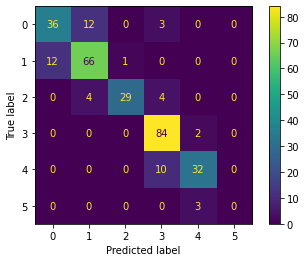

In [96]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

In [72]:
use_samples = [27400, 84, 19087, 90, 12500.04, 90, 22000, 100, 68, 29, -155, ]
test_pred = []

test_pred = np.array(use_samples)
test_pred.reshape(len(test_pred), 1)

#predictions = model.predict(test_pred)
#predictions


array([[27400.  ],
       [   84.  ],
       [19087.  ],
       [   90.  ],
       [12500.04],
       [   90.  ],
       [22000.  ],
       [  100.  ],
       [   68.  ],
       [   29.  ],
       [ -155.  ]])

In [73]:
predictions = model.predict(test_pred)
predictions


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[27400.      84.   19087.      90.   12500.04    90.   22000.     100.
    68.      29.    -155.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)


In [75]:
model.fit([[10923, 5, 11330, 7, 10003, 0, 12200, 12, 6, 31, -158],])

TypeError: fit() missing 1 required positional argument: 'y'

In [76]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
#model.predict([[27400, 84, 19087, 90, 12500.04, 90, 22000, 100, 68,29,-155]])

from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator= model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 3.27 s
Wall time: 1min 8s


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8855140186915887

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

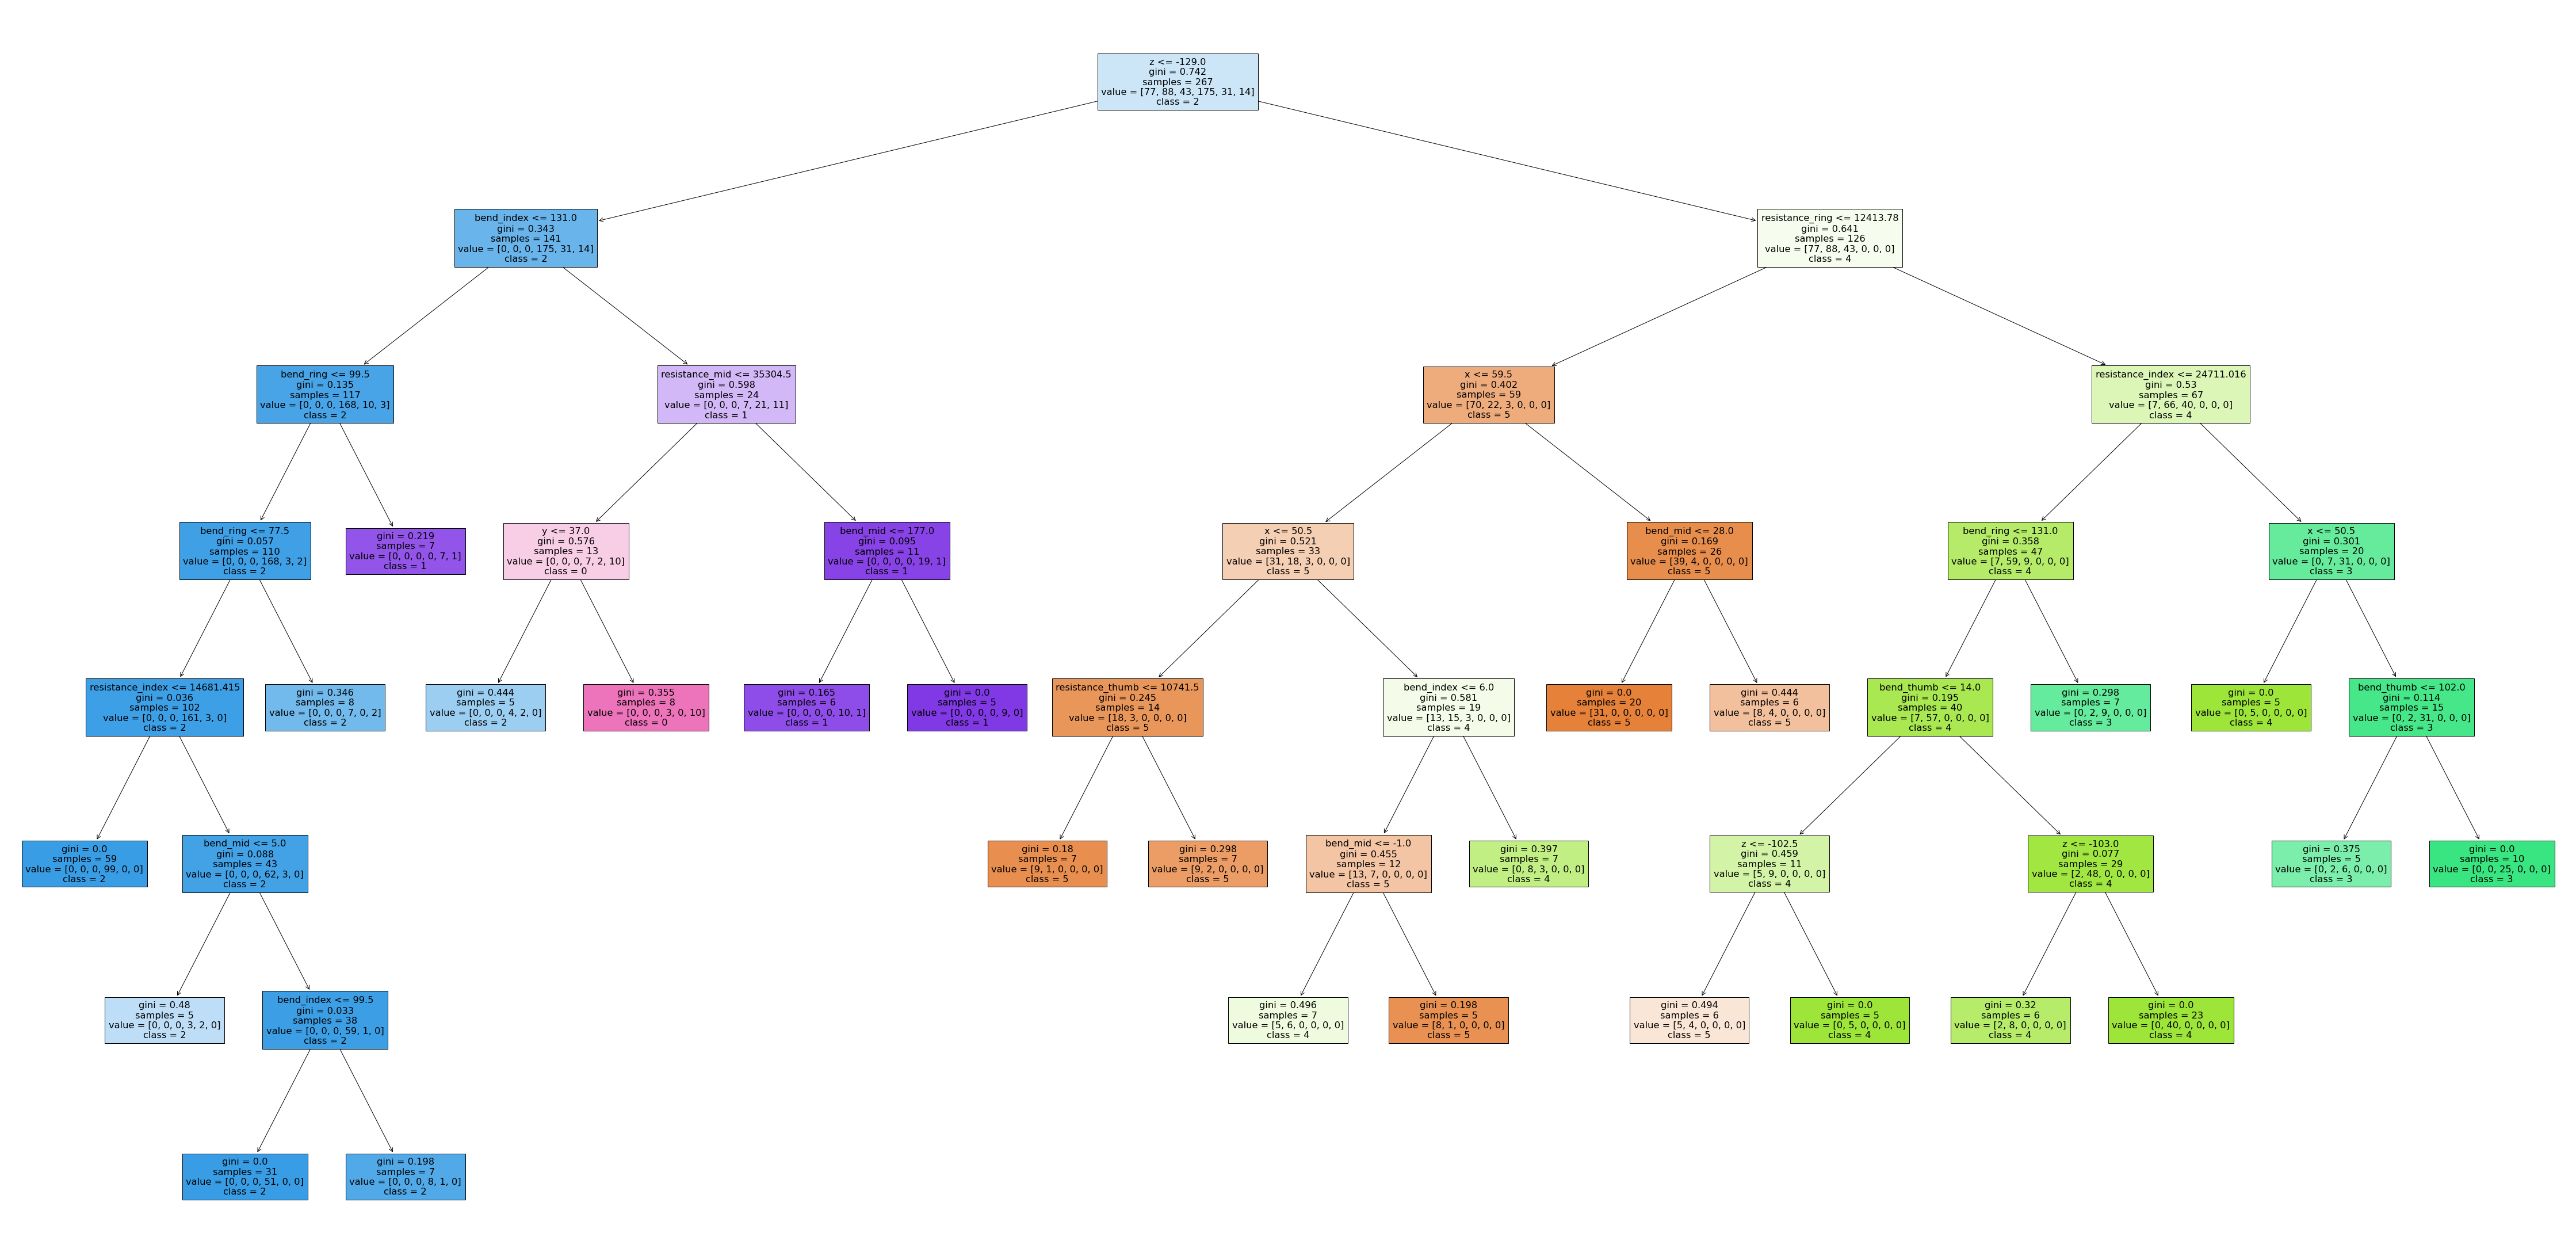

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['5', '4', '3', '2', '1', '0'],filled=True);

In [ ]:
rf_best.feature_importances_

array([0.04955784, 0.03424746, 0.07254392, 0.08789719, 0.05569357,
       0.07365468, 0.06015171, 0.0671223 , 0.13442365, 0.09129949,
       0.27340819])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,z,0.273408
8,x,0.134424
9,y,0.091299
3,bend_index,0.087897
5,bend_mid,0.073655
2,resistance_index,0.072544
7,bend_ring,0.067122
6,resistance_ring,0.060152
4,resistance_mid,0.055694
0,resistance_thumb,0.049558
